# Przygotowanie danych

Zanim zaczniesz pracować nad danymi (przeprowadzać analizę statystyczną), ważne jest aby zrozumieć/przeanalizować nasze dane.

Przeanalizujemy dane z https://www.lendingclub.com/public/how-peer-lending-works.action. Zawierają one informacje o wnioskach kredytowych. 

<center>
<h1> Naszym celem jest przewidzieć czy inwestycja się uda, a kredytobiorca zwróci kredyt. </h1>
</center>

Pobierz plik ze strony https://www.dropbox.com/s/spzn2s7anh7tnn9/jaypeedevlin-lending-club-loan-data-2007-11.zip?dl=0

Mamy do dyspozycji dwa pliki
<ul>
<li> lending_club_loans.csv – zawiera dane</li>
<li> LCDataDictionary.csv – zawiera opis poszczególnych kolumn </li>
</ul>

Nasz zbiór danych zawiera informacje o bieżących kredytach, spłaconych pożyczkach i niespłacanych pożyczkach. 

Po pierwsze, importuj niektóre z bibliotek, które będziemy używać.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ustawiamy kilka parametrów, które ułatwią nam zczytanie danych:
<ul>
<li> Usuwamy pierwszą linię: zawiera zbędny tekst zamiast tytułów kolumn.</li> 
<li> Usuwamy kolumnę ‘desc’: zawiera długie wyjaśnienie dotyczące pożyczki.</li>
<li> Usuwamy kolumnę ‘url’: zawiera link do każdego z Klubów Kredytowych.</li>
<li> Usunięcie wszystkich kolumn o więcej niż 50% brakujących wartościach: Pozwala to na szybsze poruszanie się, ponieważ nie trzeba poświęcać czasu na próby wypełnienia tych wartości.
</li>
</ul>


In [5]:
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [6]:
# skip row 1 so pandas can parse the data properly.
loans_2007 = pd.read_csv('C:\PythonScripts\lending_club_loans.csv', skiprows=1, low_memory=False) 
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans_2007 = loans_2007.drop(['url','desc'],axis=1)      # These columns are not useful for our purposes

In [7]:
print(loans_2007.shape)
loans_2007.head(3)

(42538, 56)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


# Musimy zapoznać się z kolumnami w zbiorze danych
Musimy zapoznać się z kolumnami w zbiorze danych, aby zrozumieć, co reprezentuje każda cecha. Jest to ważne, ponieważ nie zrozumienie danych może powodować błędy w analizie i procesie modelowania.
Najczęściej do każdego zbioru danych dodany jest plik z opisem (http://archive.ics.uci.edu/ml/)
Aby to ułatwić mamy przygotowany słownik danych w pliku CSV.


In [8]:
data_dictionary = pd.read_csv('C:\PythonScripts\LCDataDictionary.csv') # Loading in the data dictionary
print(data_dictionary.shape)
print(data_dictionary.columns.tolist())

(117, 2)
['LoanStatNew', 'Description']


In [9]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name','Description': 'description'})
data_dictionary.head()

,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [10]:
type(data_dictionary)

pandas.core.frame.DataFrame

In [11]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 56 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

# Tworzymy DataFrame z nazwami kolumn i ich opisami
Teraz, gdy mamy ładny słownik danych, dodajemy do niego pierwszy wiersz z przykładowymi wartościami (żeby widzieć jaki mają format) oraz tworzymy DataFrame żeby mieć dobry dostęp do danych z nazwami kolumn:
<ul>
<li>name - zawiera nazwy kolumn naszego pliku. </li>
<li>dtypes - zawiera typy danych w kolumnach. </li>
<li>first value - zawiera wartości pierwszego rzędu danych. </li>
<li>description - wyjaśnia, co oznacza każda kolumna danych. </li>
</ul>


In [12]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

loans_2007_dtypes['first value'] = loans_2007.loc[0].values
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [13]:
preview.head(10)

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


# Usuwanie zbędnych kolumn - 1
Podczas przeglądania kolumn warto zwrócić uwagę na kolumny, które:
<ul>
<li> ujawniają informacje z przyszłości np. po udzieleniu pożyczki (<b>information leaks</b>), 
</li>
<li> nie mają wpływu na badane zmienne (np. Losowo wygenerowane wartości id),
</li>
<li>są źle sformatowane </li>
<li>są ciężkie do przerobienia na format liczbowy, </li>
<li>zawierają zbędne informacje. </li>
</ul>


Wyświetlmy pierwsze 19 wierszy

In [14]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


# Po analizie kolumn możemy stwierdzić, że można usunąć następujące z nich:

<ul>
<li><tt>id</tt> - losowo generowane pole </li>
<li><tt>member_id</tt> - również losowo generowane pole </li>
<li><tt>funded_amnt</tt> - ujawnia informacje z przyszłości (po tym, jak pożyczka została już uruchomiona). </li>
<li><tt>funded_amnt_inv</tt> - także ujawnia dane z przyszłości. </li>
<li><tt>sub_grade</tt> - zawiera nadmiarowe informacje, które znajdują się już w kolumnie  <tt>grade</tt></li>
<li><tt>int_rate</tt> - również zawiera się w kolumnie  <tt>grade</tt>. </li>
<li><tt>emp_title</tt> - wymaga dużo przetwarzania, aby stać się potencjalnie użyteczna</li>
<li><tt>issued_d</tt> - wyciek danych z przyszłości. </li>
<ul>


In [15]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)

# Usuwanie zbędnych kolumn - 2
Przejdźmy do następnych 19 kolumn:

In [16]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3,The number of open credit lines in the borrower's credit file.


# Po analizie kolumn możemy stwierdzić, że można usunąć następujące z nich:
<ul>
<li><tt> zip_code </tt> - informacja zawiera się w kolumnie <tt>addr_state</tt> (ponieważ widoczne są tylko pierwsze 3 cyfry 5-cyfrowego kodu pocztowego).</li>
<li><tt> out_prncp</tt> - wyciek danych z przyszłości.</li>
<li><tt> out_prncp_inv</tt> - także wyciek danych z przyszłości.</li>
<li><tt> total_pymnt</tt> - także wyciek danych z przyszłości.</li>
<li><tt> total_pymnt_inv</tt> - także wyciek danych z przyszłości.</li>
<ul>


In [17]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

# Usuwanie zbędnych kolumn - 3
Przeanalizuj ostatnią grupę kolumn:

In [18]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740,The lower boundary range the borrower’s last FICO pulled belongs to.


# Tutaj musimy usunąć poniższe dane, które odnoszą się do przyszłości:
<ul>
<li><tt>total_rec_prncp</tt></li>
<li><tt>total_rec_int</tt></li>
<li><tt>total_rec_late_fee</tt></li>
<li><tt>recoveries</tt></li>
<li><tt>collection_recovery_fee</tt></li>
<li><tt>last_pymnt_d</tt></li>
<li><tt>last_pymnt_amnt</tt></li>
<ul>

    

In [19]:
drop_cols = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt']

loans_2007 = loans_2007.drop(drop_cols, axis=1)

# Zajmijmy się bliżej kolumnami  <tt>fico_range_low</tt>,  <tt>fico_range_high</tt>,  <tt>last_fico_range_low</tt>, <tt>last_fico_range_high</tt>.

Wyniki FICO to ocena kredytowa czyli wartość liczbowa używana przez banki i instytucje kredytowe do określania wiarygodności osoby. Choć w Stanach Zjednoczonych jest kilka takich miar to FICO jest najbardziej znana i najczęściej używana.

Kiedy kredytobiorca ubiegający się o pożyczkę uzyskuje ocenę kredytową FICO - otrzymuje dolną i górną granicę zakresu, do której należy (<tt>fico_range_low</tt>,  <tt>fico_range_high</tt>). Następnie wszystkie aktualizacje wyników kredytobiorców są rejestrowane jako <tt>last_fico_range_low</tt> i <tt>last_fico_range_high</tt>.

## Kluczową częścią każdego projektu w dziedzinie analizy danych jest zrobienie wszystkiego aby zrozumieć dane. 

Badając nasze dane, można odnieść się do innych projektów, które je analizowały. W 2014 roku grupa studentów z Uniwersytetu Stanford w raporcie (http://cs229.stanford.edu/proj2014/Kevin%20Tsai,Sivagami%20Ramiah,Sudhanshu%20Singh,Peer%20Lending%20Risk%20Predictor.pdf)  wymieniła <tt>last_fico_range</tt> jako czynnik, który powoduje użycie informacji z przyszłości.

Natomiast inna grupa ze Stanford pracująca nad tymi samymi danymi wykorzystała tę kolumnę w swoich modelach. W raporcie z tej drugiej grupy (http://cs229.stanford.edu/proj2015/199_report.pdf) opisano <tt>last_fico_range_high</tt> jako jedną z ważniejszych kolumn umożliwiającą predykcję.

Pytanie, na które musimy odpowiedzieć, to czy informacje o wyniku kredytowym FICO używają informacji z przyszłości? Przypomnijmy, że kolumna jest uważana za wyciek informacji, gdy w szczególności nie będzie ona dostępna w momencie korzystania z naszego modelu - w tym przypadku, gdy używamy naszego modelu dotyczącego przyszłych pożyczek.

Ten blog (https://www.peercube.com/blog/post/fico-score-trends-and-defaults-for-lending-club-loans) który analizuje wyniki FICO dotyczące udzielania pożyczek, twierdzi że nasza kolumna jest świetnym predyktorem tego, czy pożyczka będzie spłacona, ponieważ wyniki FICO są aktualizowane po udzieleniu pożyczki.

Ponadto twierdzą, że powinno się używać średniej wartości  <tt>fico_range_low</tt> i <tt>fico_range_high</tt>.

## Dlatego możemy bezpiecznie używać <tt>fico_range_low</tt> i <tt>fico_range_high</tt>, ale nie <tt>last_fico_range_low</tt> i <tt>last_fico_range_high</tt>. 

Przyjrzyj się wartościom w tych kolumnach:


In [20]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


# Brakujące wartości
Pozbądźmy się brakujących wartości, a następnie narysujmy histogramy dla tych kolumn:

42538
42535


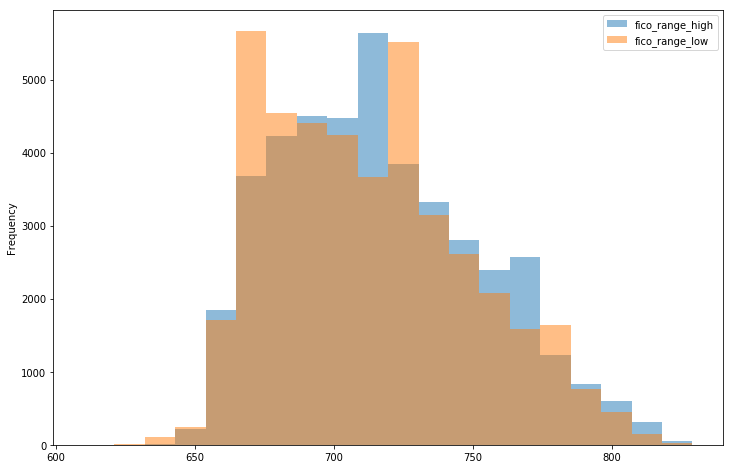

In [21]:
fico_columns = ['fico_range_high','fico_range_low']
print(loans_2007.shape[0])

# usunięcie wierszy, które podane kolumny mają puste
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape[0])

loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20);

# Możemy wziąć średnią z kolumny <tt>fico_range_low</tt> i <tt>fico_range_high</tt>.

In [22]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2

Spójrzmy jak to wygląda

In [23]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


Gdy mamy obliczone nasze średnie, to możemy opuścić odpowiednie kolumny. 

In [24]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low',
             'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape

(42535, 33)

In [25]:
loans_2007.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,697.0


## Zwróć uwagę, że po dokładnym przeanalizowaniu kolumn zbioru danych możemy zmniejszyć z 56 do 33 kolumn.
Zastanówmy się teraz nad odpowiednią kolumną, która ma być używana jako kolumna docelowa do modelowania.

### Pamiętaj, że głównym celem jest przewidzenie, kto spłaci pożyczkę, a kto nie.

Na podstawie danych dowiedzieliśmy się, że <tt> loan_status</tt> jest jedyną kolumną, która opisuje stan kredytu, dlatego skorzystaj z tej kolumny jako kolumny docelowej.


In [26]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


Aktualnie ta kolumna zawiera wartości tekstowe, które muszą zostać przeliczone na wartości liczbowe, które mogą być użyte w modelu.

Zbadajmy różne wartości w tej kolumnie i zaproponujemy strategię konwersji wartości w tej kolumnie. Użyjemy metody DataFrame <tt>value_counts()</tt>, aby zwrócić ilość wystąpień unikalnych wartości w kolumnie <tt>loan_status</tt>.


In [27]:
loans_2007["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

## Stan pożyczki ma dziewięć różnych możliwych wartości. Sprawdźmy co te wartości oznaczają.

In [31]:
meaning = [
    "Loan has been fully paid off.",
    "Loan for which there is no longer a reasonable expectation of further payments.",
    "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "Loan is up to date on current payments.",
    "The loan is past due but still in the grace period of 15 days.",
    "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
    "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
    "Loan is defaulted on and no payment has been made for more than 121 days."]

status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values

loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


## Pamiętajmy, że naszym celem jest zbudowanie modelu opisującego kredyty, które zostaną spłacone lub nie.

Z powyższej tabeli wynika, że w kolumnach  <tt>Fully Paid</tt> oraz <tt>Charged Off</tt> mamy dokładnie te informacje. Pozostałe wartości opisują kredyty w trakcie realizacji.

Usuńmy wszystkie wiersze, które nie zawierają wartości <tt>Fully Paid</tt> oraz <tt>Charged Off</tt>, a następnie przekształcamy wartości na dane liczbowe 0, 1.

In [32]:
loans_2007 = loans_2007[(loans_2007["loan_status"] == "Fully Paid") |
                            (loans_2007["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans_2007 = loans_2007.replace(mapping_dictionary)

In [33]:
filtered_loans=loans_2007
filtered_loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,n,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,n,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,f,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,732.0


Możemy zwizualizować nasze dane. Te wykresy wskazują, że znaczna liczba kredytów została spłacona - 85,62%.

(39239, 33)


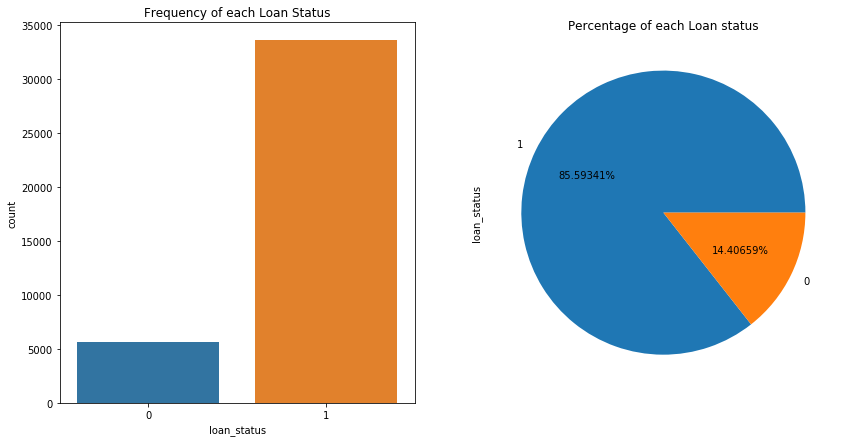

In [42]:
print(filtered_loans.shape)
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
filtered_loans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.5f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()
# 1 - całkowicie spłacony, 0 - niespłacony

# Usuwanie kolumn tylko z jedną wartością
Przyjrzyjmy się kolumnom zawierającym tylko jedną unikatową wartość i usuńmy je. Te kolumny nie będą przydatne dla modelu. 
Metoda <tt> nunique()</tt> zwraca liczbę unikalnych wartości. Możemy zastosować tę metodę w całym zbiorze danych w celu usunięcia ich.


In [47]:
loans_2007.nunique().sort_values(ascending=False)

revol_bal                     21517
title                         19512
installment                   15241
annual_inc                     5282
dti                            2860
revol_util                     1089
loan_amnt                       876
earliest_cr_line                526
last_credit_pull_d              110
total_acc                        82
addr_state                       50
open_acc                         40
fico_average                     36
purpose                          14
delinq_2yrs                      11
emp_length                       11
inq_last_6mths                    9
grade                             7
home_ownership                    5
pub_rec                           5
pub_rec_bankruptcies              3
verification_status               3
loan_status                       2
term                              2
pymnt_plan                        2
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq              

In [54]:
# more_unique_value = loans_2007.nunique() != 1
# more_unique_value
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

In [55]:
loans_2007.nunique().sort_values(ascending=False)

revol_bal               21517
title                   19512
installment             15241
annual_inc               5282
dti                      2860
revol_util               1089
loan_amnt                 876
earliest_cr_line          526
last_credit_pull_d        110
total_acc                  82
addr_state                 50
open_acc                   40
fico_average               36
purpose                    14
delinq_2yrs                11
emp_length                 11
inq_last_6mths              9
grade                       7
home_ownership              5
pub_rec                     5
pub_rec_bankruptcies        3
verification_status         3
pymnt_plan                  2
loan_status                 2
term                        2
dtype: int64

Może występować kilka kolumn zawierających więcej niż jedną unikatową wartość, ale jedna z wartości występuje znacznie częściej. 

In [58]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 5):
        print(loans_2007[col].value_counts())
        print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_status, dtype: int64

n    39238
y        1
Name: pymnt_plan, dtype: int64

0.0    36872
1.0     1665
2.0        5
Name: pub_rec_bankruptcies, dtype: int64



Kolumna planu płatności <tt>pymnt_plan</tt> przyjmuje tylko dwie unikatowe wartości (w tym jedna z nich występuje tylko raz), więc możemy ją usunąć.

In [59]:
print(loans_2007.shape[1])
loans_2007 = loans_2007.drop('pymnt_plan', axis=1)
print("We've been able to reduced the features to => {}".format(loans_2007.shape[1]))

25
We've been able to reduced the features to => 24


# Zapiszmy nasze dane do pliku

In [60]:
loans_2007.to_csv("filtered_loans_2007_z_D01_Z09.csv",index=False)

# Brakujące wartości (Missing Values)
Wczytajmy spowrotem nasze dane

In [61]:
filtered_loans = pd.read_csv('filtered_loans_2007_z_D01_Z09.csv', sep=',', encoding='latin-1')
print(filtered_loans.shape)
filtered_loans.head()

(39239, 24)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,732.0


## Musimy usunąć brakujące wartości. 

Po pierwsze, użyjemy metody <tt>isnull()</tt>, która zwraca ramkę danych z wartościami:
<ul>
<li><tt>True</tt> -  jeśli pierwotna wartość jest null-em</li>
<li><tt>False</tt> -  jeśli pierwotna wartość nie jest null-em</li>
</ul>

Następnie należy użyć metody<tt>sum()</tt> aby obliczyć liczbę wartości <tt>null</tt> w każdej kolumnie.


In [71]:
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_average               0
dtype: int64


Podczas gdy większość kolumn ma 0 brakujących wartości to: 
<ul>
<li><tt>Title</tt> zawiera 9 brakujących wartości, </li> 
<li><tt>revol_util</tt> ma 48 brakujących wartości, </li>
<li><tt>pub_rec_bankruptcies<tt> zawiera 675 brakujących wartości.</li> 
 </ul>

Usuń kolumny zawierające więcej niż 1% (392) wartość <tt>null</tt>. Co więcej, usuń pozostałe wiersze zawierające wartości null, co oznacza, że utracimy trochę danych.


In [62]:
filtered_loans = filtered_loans.drop("pub_rec_bankruptcies",axis=1)
filtered_loans = filtered_loans.dropna()

In [63]:
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt              0
term                   0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
fico_average           0
dtype: int64


# Wszystkie kolumny muszą być reprezentowane jako kolumny numeryczne 
Aby móc modelować dane wszystkie kolumny muszą być reprezentowane jako kolumny numeryczne (typu <tt>int</tt> lub <tt>float</tt>). Wypiszmy teraz liczności kolumn ze względu na typ danych jaki przechowują.

In [64]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
object     11
float64    11
int64       1
dtype: int64


Aby móc modelować dane, wszystkie kolumny muszą być reprezentowane jako kolumny numeryczne (typu <tt>int</tt> lub <tt>float</tt>). Wypiszmy teraz liczności kolumn ze względu na typ danych jaki przechowują.

Mamy 11 kolumn zawierających tekst, które należy przekształcić do postaci numerycznej. 
Wybierzmy kolumny zawierające elementy typu <tt> object</tt>  za pomocą funkcji <tt>select_dtype</tt>, a następnie wyświetl wiersz próbki, aby lepiej zrozumieć, jak sformatowane są wartości w każdej kolumnie.


In [65]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


Zauważ, że kolumna <tt>revol_util</tt> zawiera wartości numeryczne, ale jest sformatowana jako <tt>obiekt</tt>.  
Musimy przekonwertować <tt>revol_util</tt>  na wartości liczbowe. 

Oto co powinniśmy zrobić:
<ul>
<li>możemy użyć metody <tt>str.rstrip()</tt>, aby usunąć procent (%).</li>
<li>na wynikowym obiekcie możemy użyć metody  <tt>astype()</tt> aby przekonwertować wartość do typu <tt>float</tt>. </li>
<li>teraz możemy wynik zapisać do kolumny <tt>revol_util</tt> . </li>
</ul>


In [66]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')

In [69]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[5])

term                            60 months
grade                                   C
emp_length                        8 years
home_ownership                       RENT
verification_status          Not Verified
purpose                debt_consolidation
title                                Loan
addr_state                             NC
earliest_cr_line                 Jul-2005
last_credit_pull_d               Sep-2016
Name: 5, dtype: object


In [70]:
filtered_loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,Sep-2016,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,Sep-2016,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,Sep-2016,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,Apr-2016,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,Jan-2016,732.0


# Kolumny:
<ul>
<li><tt>addr_state</tt></li>
<li><tt>last_credit_pull_d</tt></li>
<li><tt>earliest_cr_line</tt></li>
<li><tt>title</tt></li>
</ul>
 zawierają bardzo różne wartości, które będzie trudno zamienić na dane numeryczne

In [71]:
for name in ['last_credit_pull_d','addr_state','title','earliest_cr_line']:
    print("Unique Values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: last_credit_pull_d

Sep-2016    14177
Mar-2016      805
Aug-2016      695
Feb-2013      657
Apr-2016      651
Jul-2016      570
Feb-2016      566
Jun-2016      507
Jan-2016      498
May-2016      485
Dec-2015      468
Dec-2014      462
Jul-2014      460
Mar-2013      456
Sep-2014      447
Mar-2014      445
Aug-2014      439
Jul-2015      435
Oct-2014      429
Feb-2014      419
Nov-2015      415
Sep-2015      407
Jan-2014      406
Oct-2015      404
Nov-2014      394
Apr-2014      387
May-2014      364
Jun-2014      357
Nov-2013      353
Jan-2015      348
            ...  
Dec-2009       29
Jan-2010       27
Oct-2009       24
Nov-2009       19
Aug-2009       17
Feb-2009       16
Apr-2009       15
Aug-2007       15
Jun-2009       13
Jul-2009       13
Jan-2009       12
Jun-2007       12
Sep-2009       10
Mar-2009       10
May-2009       10
Oct-2008        9
Aug-2008        8
Dec-2008        5
Sep-2008        5
Mar-2008        4
Oct-2007        3
Feb-2008        3
J

Usuńmy je

In [72]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

In [73]:
bject_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


In [74]:
filtered_loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0


# Dane kategoryczne
Niektóre wartości kategoryczne są w naturalnej kolejności/porządku. Można te dane sortować/porządkować w kolejności rosnącej/malejącej np. w kolumnie <tt> grade </tt> przydzielona jest ocena od A do G gdzie A oznacza mniej ryzykowaną inwestycję niż B.

$A <B <C <D <E <F <G$

Niektórych wartości nominalnych nie można uporządkować np. columna <tt> purpose</tt> 
Nie można napisać:

$car < wedding < education < moving < house$


# Dane uporządkowane
Rozważamy kolumny:
<ul>
<li><tt>grade</tt></li>
<li><tt>emp_length</tt></li>
</ul>

Aby odwzorować wartości porządkowe na liczbę całkowitą, możemy użyć metody <tt>replace()</tt> :


In [75]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
 
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


In [76]:
filtered_loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average
0,5000.0,36 months,162.87,2,10,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0
1,2500.0,60 months,59.83,3,0,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0
2,2400.0,36 months,84.33,3,10,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0
3,10000.0,36 months,339.31,3,10,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0
4,5000.0,36 months,156.46,1,3,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0


# Dane nieuporządkowane
Rozważamy kolumny:
<ul>
<li><tt>home_ownership</tt></li>
<li><tt>verification_status</tt></li>
<li><tt>purpose</tt></li>
<li><tt>term</tt></li>
</ul>
Przejdźmy do wartości nominalnych. Podejście do przekształcania cech nominalnych w cechy numeryczne polega na kodowaniu ich jako <tt>dummy variables</tt>. 
Czyli:
<ul>
<li>za pomocą metody <tt>get_dummies ()</tt> aby stworzyć reprezentację (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)</li>
<li>następnie za pomocą metody <tt>concat()</tt> aby dodać nowe kolumny do danych
<li>na koniec usuwamy stare kolumny</li>
</ul>


In [77]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)

In [78]:
filtered_loans.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [79]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 0 to 39238
Data columns (total 39 columns):
loan_amnt                              38123 non-null float64
installment                            38123 non-null float64
grade                                  38123 non-null int64
emp_length                             38123 non-null int64
annual_inc                             38123 non-null float64
loan_status                            38123 non-null int64
dti                                    38123 non-null float64
delinq_2yrs                            38123 non-null float64
inq_last_6mths                         38123 non-null float64
open_acc                               38123 non-null float64
pub_rec                                38123 non-null float64
revol_bal                              38123 non-null float64
revol_util                             38123 non-null float64
total_acc                              38123 non-null float64
fico_average                 

In [80]:
filtered_loans.to_csv("cleaned_loans_2007_LAST.csv",index=False)